In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Funciones

In [45]:
def visualizacion_ppes(df_ppes, region, fecha_i, fecha_f, col_fechas = 'date'):
    '''
    df_ppes = df con datos de preciptaciones
    region = region que se quiere graficar (string)
    fecha_i/fecha_f = fecha inicial y final de periodo a analizar. En un string de formato 'dd-mm-yyyy' 
    col_fechas = columna donde estan las fechas en el df de precipitaciones
    '''
    try:
        df_ppes_region = df_ppes[[col_fechas, region]]
    except:
        print('Región no en datos')
        return np.nan

    try:
        fecha_i = pd.to_datetime(fecha_i, format = '%d-%m-%Y')
        fecha_f = pd.to_datetime(fecha_f, format = '%d-%m-%Y')
        df_ppes_region_fechas = df_ppes_region[(df_ppes_region[col_fechas] >= fecha_i) & (df_ppes_region[col_fechas] <= fecha_f)]
    except:
        print('Revisar fechas')
        return np.nan
        
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(df_ppes_region_fechas[col_fechas], df_ppes_region_fechas[region])
    ax.set_title(f"Precipitaciones en región {' '.join(region.split('_')).title().strip()}")
    ax.set_ylabel('Precipitaciones [mm]')
    ax.set_xlabel('Fecha')

    ax.grid(True)
    plt.show()

def precipitaciones_ano(df_ppes, anos, region, col_fechas = 'date'):
    df_ppes['ano'] = df_ppes[col_fechas].apply(lambda x: x.year)
    df_ppes['mes'] = df_ppes[col_fechas].apply(lambda x: x.strftime("%B"))

    try:
        precipitaciones_region = df_ppes[['ano', 'mes', col_fechas, region]]
    except:
        print('Región no en datos')
        return np.nan
    
    try:
        precipitaciones_region_ano = precipitaciones_region[precipitaciones_region.ano.isin(anos)]
    except:
        print('Revisar lista de años')
        return np.nan

    fig, ax = plt.subplots(figsize = (16,8))
    for ano in anos:
        precipitaciones_ano = precipitaciones_region_ano[precipitaciones_region_ano.ano == ano]
        ax.plot(precipitaciones_ano['mes'], precipitaciones_ano[region], label=ano)
    ax.set_title(f"Precipitaciones en región {' '.join(region.split('_')).title().strip()}")
    ax.set_ylabel('Precipitaciones [mm]')
    ax.set_xlabel('Mes')
    ax.grid(True)
    ax.legend()
    
def series_pib(df, serie1, serie2, fecha_i, fecha_f, col_fecha):
    banco_central_pib_ = df[(df[col_fecha] >= fecha_i) & (df[col_fecha] <= fecha_f)]
    banco_central_pib_serie = banco_central_pib_[[serie1, serie2, col_fecha]]
    banco_central_pib_serie = banco_central_pib_serie.sort_values(by = col_fecha, ascending = True)
    series = [serie1, serie2]
    fig, ax = plt.subplots(figsize = (16,8))
    for serie in series:
        banco_central_pib_selec = banco_central_pib_serie[[serie, 'Periodo']]
        ax.plot(banco_central_pib_selec['Periodo'], banco_central_pib_selec[serie], label=serie.replace('_', ' ').replace('PIB', '').strip())
    ax.set_title(f"PIB entre {fecha_i} y {max(banco_central_pib_selec.Periodo)}")
    ax.set_ylabel('$')
    ax.set_xlabel('Periodo')
    ax.grid(True)
    ax.legend()

## Precipitaciones

In [ ]:
precipitaciones = pd.read_csv('tmp/precipitaciones_clean.csv')
precipitaciones['date'] = pd.to_datetime(precipitaciones['date'], format = '%Y-%m-%d')

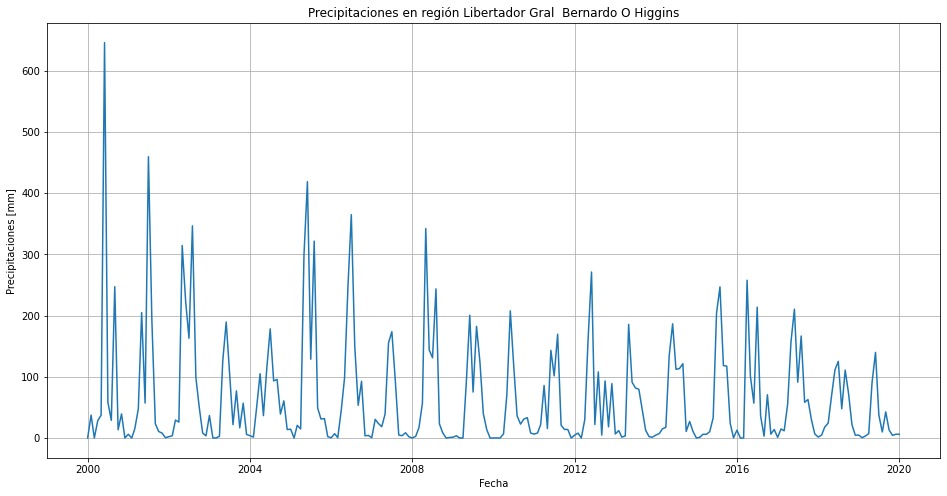

jhola


In [47]:
# precipitaciones en Ohiggins vs Metropolitana
fecha_i = '01-01-2000'
fecha_f = '01-01-2020'

fig = visualizacion_ppes(precipitaciones, 'Libertador_Gral__Bernardo_O_Higgins', fecha_i, fecha_f)

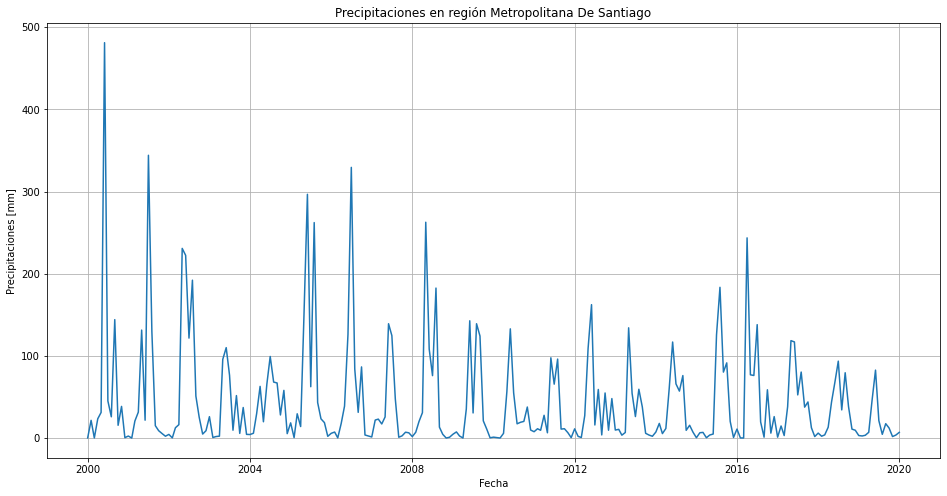

In [28]:
visualizacion_ppes(precipitaciones, 'Metropolitana_de_Santiago', fecha_i, fecha_f)

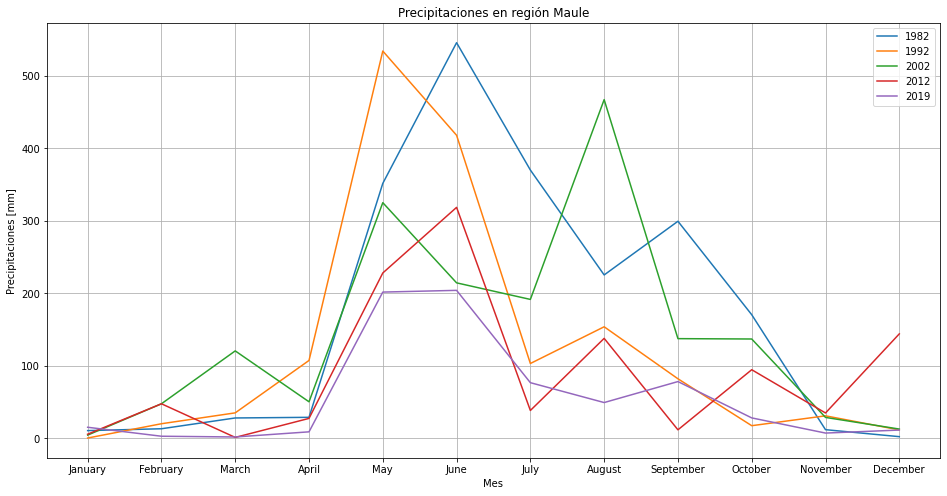

In [29]:
# Precipitaciones para la región del maule durante 1982, 1992, 2002, 2012, 2019
precipitaciones_ano(precipitaciones, [1982, 1992, 2002, 2012, 2019], 'Maule')

## Banco Central

In [33]:
banco_central_pib = pd.read_csv('tmp/banco_central_pib_clean.csv')
banco_central_pib['Periodo'] = pd.to_datetime(banco_central_pib['Periodo'], format = '%Y-%m-%d', errors = 'coerce')

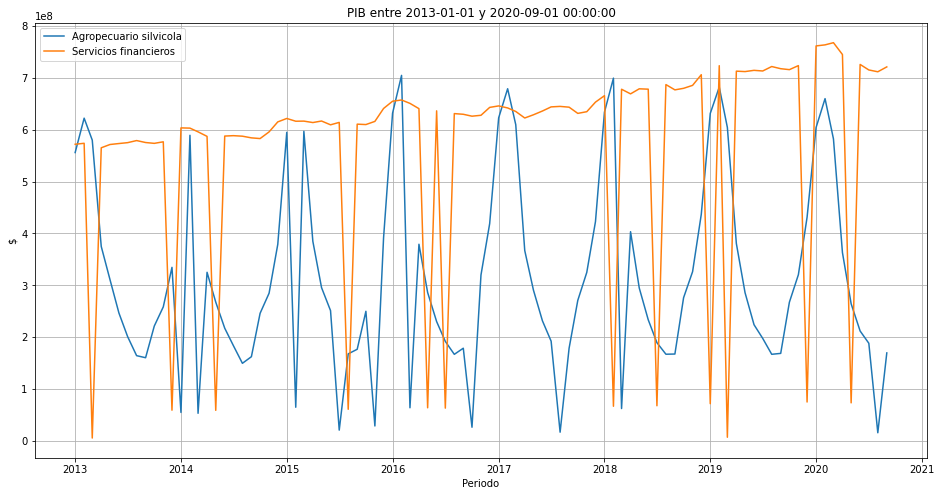

In [34]:
#visualizar dos series hcas de PIB >=2013-01-01
serie1 = 'PIB_Agropecuario_silvicola'
serie2 = 'PIB_Servicios_financieros'
fecha_i = '2013-01-01'
fecha_f = '2021-04-01'
col_fecha = 'Periodo'

series_pib(banco_central_pib, serie1, serie2, fecha_i, fecha_f, col_fecha)

## Precio Leche

In [42]:
precio_leche = pd.read_csv('tmp/precio_leche_clean.csv')

<AxesSubplot:xlabel='mes-ano'>

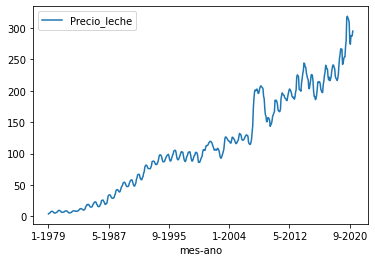

In [43]:
precio_leche.plot(x = 'mes-ano', y = 'Precio_leche') #alza 2010-2011?

<AxesSubplot:xlabel='mes-ano'>

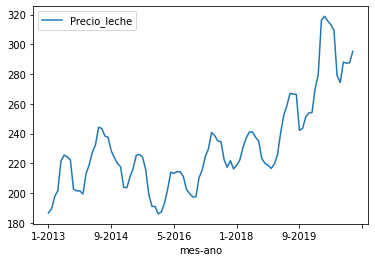

In [44]:
precio_leche[precio_leche.ano>=2013].plot(x = 'mes-ano', y = 'Precio_leche')

## Matriz de Confusion

In [38]:
precio_leche_pp_pib = pd.read_csv('tmp/precio_leche_merged.csv')

<AxesSubplot:>

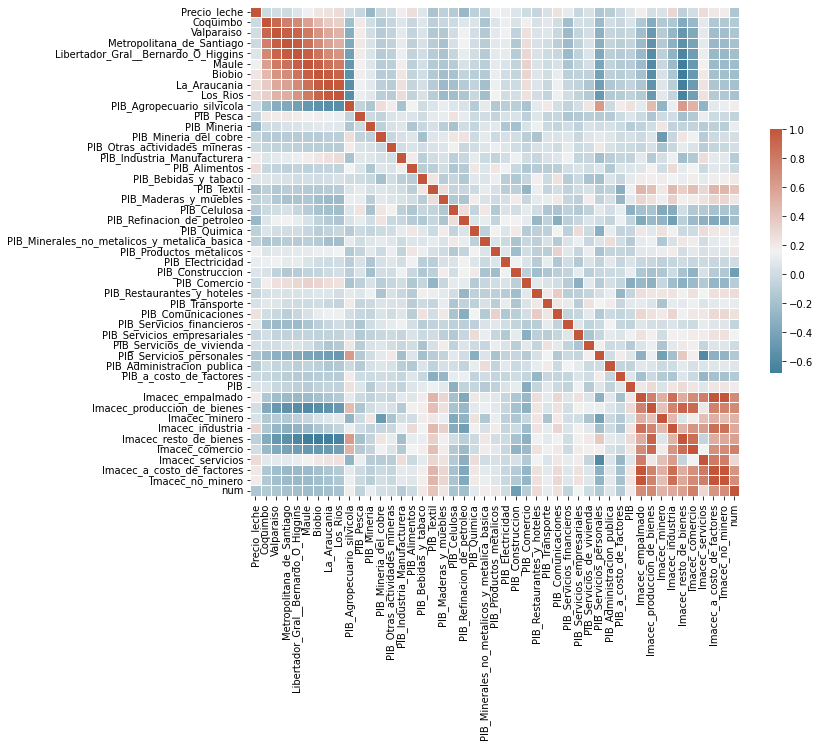

In [39]:
cc_cols = [x for x in precio_leche_pp_pib.columns if x not in ['ano', 'mes']]
# Compute the correlation matrix
corr = precio_leche_pp_pib[cc_cols].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})